In [1]:
import matplotlib.pyplot as plt
import math
import random

seed = 15

Distribution Functions

In [2]:
# Uniform distribution
def uniform_distribution(interval):
    """
    :param interval: Interval of the distribution as a tuple
    :return: Probability mass function as a list
    """
    return [1/(interval[1]-interval[0]) for _ in range(*interval)]

# Normal distribution
def normal_distribution(interval, mu, sigma):
    """
    :param interval: Interval of the distribution as a tuple
    :param mu: mean of distribution
    :param sigma: standard deviation of distribution
    :return: Probability mass function as a list
    """
    return [1/(sigma*math.sqrt(2*math.pi))*math.exp(-0.5*(math.pow((x-mu)/sigma,2)))
            for x in range(*interval)]

# Poisson distribution
def poisson_distribution(interval, _lambda=1):
    """
    :param interval: Interval of the distribution as a tuple
    :param _lambda: expected value of x
    :return: Probability mass function as a list
    """
    return [(pow(_lambda,x)*math.exp(-_lambda))/math.factorial(x)
            for x in range(*interval)]

def combine(dist1, dist2, dist1_weight=0.5, dist2_weight=0.5):
    if len(dist1) != len(dist2):
        raise ValueError("Length of lists must be the same dist1[{}] != dist2[{}]")\
            .format(len(dist1), len(dist2))
    if (dist1_weight+dist2_weight) != 1.0:
        raise ValueError("Weights must sum to 1.0")

    dist_sum = []
    for a, b in zip(dist1, dist2):
        dist_sum.append((a*dist1_weight) + (b*dist2_weight))
    return dist_sum

Uniform Distribution

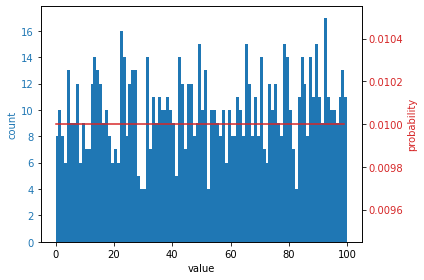

In [3]:
random.seed(seed)
interval = (0, 100)

dist = uniform_distribution(interval)
values = random.choices(range(*interval), weights=dist, k=1000)

color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.set_xlabel('value')
ax1.set_ylabel('count', color=color)
ax1.hist(values, bins=(interval[1]-interval[0]), color=color, range=interval)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('probability', color=color)  # we already handled the x-label with ax1
ax2.plot(range(*interval), dist, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Normal Distribution

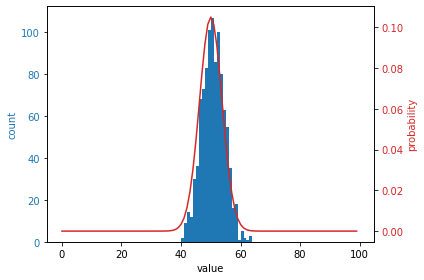

In [4]:
random.seed(seed)
interval = (0, 100)
mu = 50
sigma = 3.8

dist = normal_distribution(interval, mu, sigma)
values = random.choices(range(*interval), weights=dist, k=1000)

color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.set_xlabel('value')
ax1.set_ylabel('count', color=color)
ax1.hist(values, bins=(interval[1]-interval[0]), color=color, range=interval)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('probability', color=color)  # we already handled the x-label with ax1
ax2.plot(range(*interval), dist, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Poison Distribution

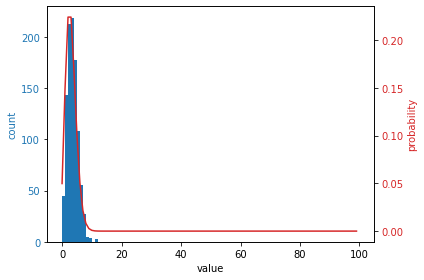

In [5]:
random.seed(seed)
interval = (0, 100)
_lambda = 3

dist = poisson_distribution(interval, _lambda)
values = random.choices(range(*interval), weights=dist, k=1000)

color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.set_xlabel('value')
ax1.set_ylabel('count', color=color)
ax1.hist(values, bins=(interval[1]-interval[0]), color=color, range=interval)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('probability', color=color)  # we already handled the x-label with ax1
ax2.plot(range(*interval), dist, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Combining distributions

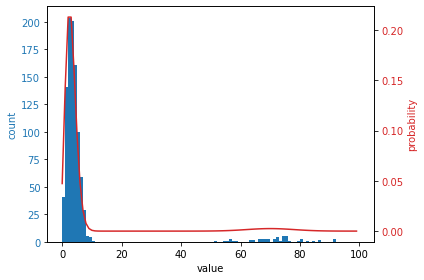

In [6]:
random.seed(seed)
interval = (0, 100)
_lambda = 3
mu = 70
sigma = 8

d1 = poisson_distribution(interval, _lambda)
d2 = normal_distribution(interval, mu, sigma)

d_comb = combine(d1, d2, dist1_weight=0.8, dist2_weight=0.2)

values = random.choices(range(*interval), weights=d_comb, k=1000)

color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.set_xlabel('value')
ax1.set_ylabel('count', color=color)
ax1.hist(values, bins=(interval[1]-interval[0]), color=color, range=interval)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('probability', color=color)  # we already handled the x-label with ax1
ax2.plot(range(*interval), d_comb, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()